# **Методы экземпляра. Аргумент self**

**Метод экземпляра** — это функция, которая определена внутри класса.

Отличия метода от обычной функции:
1. Метод, как это следует из определения, определен именно внутри класса, а не где-нибудь в другом месте.
2. Метод связан с экземпляром и вызывается от него.
3. При вызове метода первым параметром будет передан тот самый экземпляр, от которого метод был вызван.

Зачем методы нужны? Через методы реализовывается поведение объекта.

Интерпретатор python при вызове метода всегда автоматически подставляет сам экземпляр в качестве первого аргумента внутрь вызова метода. Тем самым метод всегда должен иметь в своем определении на один параметр больше, чем вам необходимо. Этот параметр принято (в соответствии с *pep8*) называть `self`.

Значение, которое поступает в `self`, является ссылкой на экземпляр класса. А через экземпляр можно получать доступ к атрибутам класса через точку. Также с помощью `self` можно создавать новые атрибуты экземпляра, изменять текущие или удалять их.

Кроме экземляра класса, в методе можно использовать какое угодно количество параметров (обязательных, необязательных, args, kwargs). Главное - определять первым параметром `self`.

**Примечание:** как только параметр `self` будет прописан внутри метода, нельзя будет вызывать этот метод через класс - только через экземпляр класса.

**Примечание 2:** помимо метода экземпляра существуют и другие типы методов. Например, статический метод и метод класса, которе раскрываются далее.

**Примечание 3**: внутри одного метода можно и порой даже нужно вызывать другой метод класса. Делается это для того, чтобы не описывать вновь одну и ту же логику и, следовательно, не дублировать код в классе.

In [ ]:
# пример класса с реализованным удалением и изменением атрибута через методы
class Car:
    model = "BMW"
    engine = 1.6

    def set_color(self, color):
        self.color = color
        print(f'Теперь у машины {self.color} цвет')

    def get_color(self):
        return self.color

    def delete_color(self):
        del self.color

# **Инициализация экземпляра. Метод __init__**

**Инициализация** — это подготовительный процесс для экземпляра класса, заключающийся в создании множества атрибутов, необходимых для дальнейшего существования и поведения объекта. В *Python* инициализация осуществляется при помощи магического метода `__init__` (от английского слова "initialization", которое дословно переводится как "инициализация"). Метод принимает экземпляр класса (`self`) и любое количество аргументов (обязательных/необязательных).

Метод `__init__` всегда должен возвращать значение `None`!

**Примечание:** любое название, которое начинается и заканчивается двумя нижними подчеркиваниями, в *Python* обозначает специальный служебный атрибут или метод. Подобные методы принято называть "магическими". Особенность магических методлв заключается в том, что он будет вызван автоматически при наступлении определенного события, закреплённого за ним. К примеру, магический метод `__init__` всегда срабатывает при создании объекта.

**Примечание 2:** при помощи метода __init__ можно сохранять экземпляры класса в список, если это нужно. В дальнейшем его можно перебирать в цикле `for`, вызывать через его элементы методы класса, получать атрибуты и т.д.

**Примечание 3:** в качестве атрибута экземпляра класса можно использовать экзепляр класса (пример).

In [ ]:
# пример класса с методом инициализации экземпляра и сохранением его в список
class Car:
    "Класс для определения характеристик машин"

    def __init__(self, model: str, horse_power: int = 0) -> None:
        self.model = model # обязательный параметр
        self.horse_power = horse_power # необязательный параметр
        self.owner = 'Rustam' # дополнительный атрибут
        cars.append(self)

    def print_info(self):
        print(f'Машина игрока {self.owner} - {self.model}.')


cars = []
toyota = Car('Toyota RAV4')
cheburek = Car('Чебурек')
print(cars) # [<__main__.Car object at 0x000001E149382B10>, <__main__.Car object at 0x000001E1493DECF0>]

# перебор экземпляров класса в цикле с применением метода
for car in cars:
    car.print_info()

# Машина игрока Rustam - Toyota RAV4.
# Машина игрока Rustam - Чебурек.

# пример использования экземпляра класса в качестве атрибута экземпляра класса
class Person:
    def __init__(self, name: str, age: int) -> None:
        self.name = name
        self.age = age
        
    def display_person_info(self) -> None:
        print(f'Person: {self.name}, {self.age}')


class Company:
    def __init__(self, company_name: str, location: str) -> None:
        self.company_name = company_name
        self.location = location
        
    def display_company_info(self) -> None:
        print(f'Company: {self.company_name}, {self.location}')


class Employee:
    def __init__(self, name: str, age: int, company_name: str, location: str) -> None:
        self.personal_data = Person(name, age)
        self.work = Company(company_name, location)

## **Моносостояние для экземпляра класса**

**Моносостояние** - паттерн, позволяющий создавать экземпляры класса с одним общим набором атрибутов. Изменение одного такого атрибута изменит его у всех экземпляров класса.

Логика паттерна - атрибут `__dict__` каждого экземпляра-класса должен ссылаться на один общий объект-словарь `__shared_attr`. Ссылка создаётся при инициализации, словарь - при определении класса или вне его (пример).

In [ ]:
# пример использования моносостояния
class Cat:
    __shared_attr = {
        'breed': 'pers',
        'color': 'black'
    }

    def __init__(self):
        self.__dict__ = Cat.__shared_attr


cat1 = Cat()
cat2 = Cat()
cat1.weight = 5  # добавляем параметр во все ЭК
cat2.color = 'red' # меняем атрибут у всех ЭК
print('cat1:', cat1.__dict__)  # cat1: {'breed': 'pers', 'color': 'red', 'weight': 5}
print('cat2:', cat2.__dict__)  # cat2: {'breed': 'pers', 'color': 'red', 'weight': 5}

# **Публичные, приватные, защищенные атрибуты и методы**

**Модификаторы доступа** - это такие ключевые слова, с помощью которых можно задать область действия данных. Или иначе - они позволяют регулировать уровень доступа к таким частям кода, как атрибуты и методы.

Как правило, в классических языках программирования (Java, C++, C#) используются следующие ключевые слова для указания модификатора доступа:
* **Модификатор public.** К атрибуту или методу, помеченному модификатором public, можно обращаться из любого места программы. Это самая высокая степень открытости – никаких ограничений нет.
* **Модификатор protected.** Если метод помечен модификатором protected, к нему можно обращаться из того же класса, того же пакета и классов наследников (классов, унаследованных от класса, в котором объявлен метод).
* **Модификатор private.** К атрибуту или методу, помеченному модификатором private, можно обращаться только из того же класса, где он объявлен. Для всех остальных классов помеченный атрибут или метод – невидимы и «как бы не существуют». Это самая высокая степень закрытости — только свой класс.

В *Python* отсутствуют ключевые слова, позволяющие указать уровень доступа, который мог бы запретить внешнему коду взаимодействовать с атрибутами объекта или класса. Вместо этого создателями языка предложили использовать следующий ряд **соглашений**:
* Любое обычное имя атрибута или метода является публичным (public) по умолчанию.
* Если имя атрибута или метода начинается с одного нижнего подчеркивания , то оно считается защищенным (protected).
* Если имя атрибута или метода начинается с двух нижних подчеркиваний, то оно считается приватным (private).

В классических языках программирования защищенный модификатор доступа не дает обращаться к таким именам вне класса (`_name`). В Python никаких ограничений в доступе к ним нет. Однако в сообществе существует соглашение: имя с префиксом подчеркивания следует рассматривать как закрытую часть класса, которая используется для внутреннего служебного использования. И именно нижним подчёркиванием в названии атрибута или метода передаётся информацию другому разработчику о том, что перед ним protected атрибут или метод, и его не следует использовать вне класса.

Приватные атрибуты и методы (`__name`) в Python недоступны вне класса (выдаёт ошибку `AttributeError`). Но это ограничение легко обойти. Шаблон следующий: `_<название класса>__<название атрибута или метода>`. Можно получить через функцию `dir()` или `__dict__`.

**Примечание:** сокрытие атрибутов - инкапсуляция. 

**Инкапсуляция** (от лат. in capsule — в оболочке) — это заключение данных и функциональности в оболочку. В объектно-ориентированном программировании в роли оболочки выступают классы: они не только собирают переменные и методы в одном месте, но и могут защищать их от вмешательства извне (сокрытие).

In [ ]:
# пример класса с использованием инкапсуляции, защищённых и приватных имён
class Employee:
    def __init__(self, name: str, position: 
                 str, hours_worked: int | float, 
                 hourly_rate: int | float) -> None:
        self.name = name
        self.__position = position
        self.__hours_worked = hours_worked
        self.__hourly_rate = hourly_rate
        
    def __calculate_salary(self) -> int | float:
        return self.__hours_worked * self.__hourly_rate

    def _set_position(self, position) -> None:
        self.__position = position
    
    def get_position(self):
        return self.__position

    def get_salary(self):
        return self.__calculate_salary()

    def get_employee_details(self):
        return f'Name: {self.name}, Position: {self.__position}, Salary: {self.__calculate_salary()}'
    

# пример доступа к защищённому атрибуту
lena = Employee('Lena', 'Manager', 200, 300)
# print(lena.__position) - будет ошибка
print(lena._Employee__position) # Manager

# **Геттеры, сеттеры, делиттеры, property атрибуты**

Периодически для каких-то задач требуется установление *контроля доступа к атрибутам*. Контроль доступа в объектно-ориентированном программировании реализуется при помощи создания промежуточных дополнительных методов, которые принято называть геттерами и сеттерами. Данные методы предоставляют интерфейс для извлечения и обновления состояния объекта, скрывая детали реализации. Такое сокрытие помогает предотвратить прямой доступ к атрибутам объекта, делая код более надежным и поддерживаемым.

**Геттер** (от слова «get» - получать) — метод, который используется для извлечения значения атрибута. Применяется только для получения значения атрибута, никак не изменяя его состояния. Также известен как *аксессор* (от слова «access» - доступ).

**Сеттер** (от слова «set» - установить) — метод, который используется для установки или обновления значения атрибута. Применяется только для изменения атрибута, никакого возврата значения внутри сеттера делать не нужно. Также известен как метод *мутатор* (от слова «mutate» - видоизменяться).

**Делиттер** (от слова «delete» - удалять) — метод, который используется для удаления значения атрибута или самого атрибута.

Этим методам обычно дают имена, соответствующие имени атрибута, к которому они обращаются, но с добавлением префикса "get", "set" или "del" соответственно.

Зачем их использовать?
* Управление и контроль доступа к атрибутам: геттеры и сеттеры предотвращают прямой доступ к атрибутам, что упрощает внесение изменений в будущем. К примеру, можно фиксировать время доступа к атрибутам или время их изменения.
* Логика проверки: в геттеры и сеттеры можно добавлять логику для проверки данных перед их установкой или получением.
* Геттеры и сеттеры обеспечивают инкапсуляцию: детали реализации скрываются от пользователя, а взамен пользователю предоставляется доступ к определенным методам. Пользователю не видна реализация данного метода и не важна сложность написания логики внутри, он просто вызывает данный метод и получает результат.
* Атрибуты только для чтения: если нужно, чтобы доступ к данным был только для чтения, то можно определить только геттер, но не определять сеттер.
* Атрибуты только для записи: если нужно, чтобы доступ к данным был только для записи (изменения), то можно определить только сеттер, но не определять геттер.
* Производные атрибуты — геттеры могут вычислять и возвращать производные значения атрибутов.

Также в *Python* реализован функционал маскировки сеттеров и геттеров под атрибуты. Самый популярный подход - превратить атрибут в свойство (property).

Превращать атрибуты класса в свойства или управляемые атрибуты позволяет встроенная функция (класс) `property()`. Также в *Python* есть ещё один метод к предоставлению управляемых атрибутов - дескрипторы.

Обычно `property()` называют функцией. Однако `property()` — это класс, предназначенный для работы как функция, а не как обычный класс. Вот почему большинство разработчиков *Python* называют его функцией. Это также причина, по которой `property()` не следует соглашению *Python* по наименованию классов (имя класса должно начинаться с заглавной буквы).

Сигнатура функции (класса) `property()`:

`property(fget=None, fset=None, fdel=None, doc=None)`

Все параметры `property()` необязательны. `fget` примнимает геттер-метод, `fset` - сеттер-метод, `fgel` - делиттер-метод. `doc` принимает строку документации.

Если обратиться к управляемому атрибуту за получением значения, `Python` автоматически вызывает метод, переданный в параметр `fget`. Если в `fget` ничего не было передано, то при обращении к свойству возникнет ошибка. Когда атрибуту присваивается новое значение (`obj.attr = value`), Python вызывает метод, переданный в параметр `fset`. Если запустить оператор `del` (`del obj.attr`), то отработает метод, переданный в атрибут `fdel`.

Свойства определяются как атрибуты классов, поэтому их можно увидеть в атрибуте `__dict__` класса.

In [ ]:
# реализация геттера, сеттера, делиттера и свойства
class Person:
    def __init__(self, name: str, age: int) -> None:
        self.name = name # здесь name - свойство!!!
        self._age = age
    
    def get_name(self): # геттер
        return self._name

    def set_name(self, value: str): # сеттер
        if isinstance(value, str) and len(value) > 0:
            self._name = value
        else:
            raise ValueError('Имя должно быть непустой строкой')
        
    def del_name(self) -> None: # делиттер
        del self._name

    name = property(fget=get_name, fset=set_name, fdel=del_name)

man = Person('Vadim', 23)
print(man.name) # Vadim

man.name = 'Daniil'
print(man.name) # Daniil
print(man.get_name()) # Daniil

woman = Person(123, 30) # отработает ValueError, так как имя при инициализации устанавливается через св-во

## **Декоратор property**

Класс `property` является дескриптором, который позволяет нам создавать атрибуты объекта, которые можно получать, устанавливать и удалять. Это означает, что можно создать атрибут, который будет вычисляться каждый раз при доступе к нему, а также позволит установить различные правила для получения и установки значения.

Дескриптор представляет собой специальный протокол или интерфейс, который позволяет контролировать доступ к атрибутам объекта через методы `__get__`, `__set__` и `__delete__`.

В *Python* дескрипторы часто используются для переопределения поведения доступа к атрибутам классов. Они позволяют определить пользовательские методы для чтения (`__get__`), записи (`__set__`) и удаления (`__delete__`) атрибутов класса, когда к ним обращаются через экземпляр этого класса.

`property` можно определить либо способом из примера выше (самым коротким и синтаксически удобным), либо альтернативным (пример ниже). Но в обоих случаях помимо изменения атрибута через свойство с именем остаётся доступ к методам. Для того, чтобы скрыть доступ к методам, необходимо воспользоваться декораторами (пример).

**Примечание:** важно, чтобы в случае сокрытия доступа к методам при помощи декоратора у метода-геттера, метода-сеттера и метода-делиттера были одинаковые имена!

In [ ]:
# альтернативный способ определения свойства
class Person:
    def __init__(self, name: str, age: int) -> None:
        self.name = name # здесь name - свойство!!!
        self._age = age
    
    def get_name(self): # геттер
        return self._name

    def set_name(self, value: str): # сеттер
        if isinstance(value, str) and len(value) > 0:
            self._name = value
        else:
            raise ValueError('Имя должно быть непустой строкой')
        
    def del_name(self) -> None: # делиттер
        del self._name

    name = property()
    name = name.getter(get_name)
    name = name.setter(set_name)
    name = name.deleter(del_name)

# определение свойства с сокрытием доступа к методам (развёрнуто)
class Person:
    def __init__(self, name: str, age: int) -> None:
        self.name = name # здесь name - свойство!!!
        self._age = age
    
    def name(self): # геттер
        return self._name
    
    my_name = property(name) # создание декоратора. Имя 'my_name' используется во избежание конфликта имён

    def name(self, value: str): # сеттер
        if isinstance(value, str) and len(value) > 0:
            self._name = value
        else:
            raise ValueError('Имя должно быть непустой строкой')
        
    my_name = my_name.setter(name) # декорируем сеттер
        
    def name(self) -> None: # делиттер
        del self._name

    name = my_name.deleter(name) # декорируем делиттер. Возвращаем свойству название 'name'

    hum = Person('Vasya', 11)
    print(hum.name) # Vasya
    hum.name = 'Petya'
    print(hum.name) # Petya

# определение свойства с сокрытием доступа к методам (кратко)
class Person:
    def __init__(self, name: str, age: int) -> None:
        self.name = name # здесь name - свойство!!!
        self._age = age
    
    @property
    def name(self): # геттер
        return self._name

    @name.setter
    def name(self, value: str): # сеттер
        if isinstance(value, str) and len(value) > 0:
            self._name = value
        else:
            raise ValueError('Имя должно быть непустой строкой')
    
    @name.deleter
    def name(self) -> None: # делиттер
        del self._name

hum = Person('Vasya', 11)
print(hum.name) # Vasya
hum.name = 'Petya'
print(hum.name) # Petya

## **Вычисляемые атрибуты**

**Вычисляемый атрибут** — это управляемый атрибут, который вычисляется при обращении к нему.

**Ленивое вычисление** (lazy evaluation) — это стратегия вычислений, при которой вычисления откладываются до момента, когда результат действительно потребуется. В контексте программирования это означает, что код не выполняет вычисления немедленно, как только они становятся доступными, а откладывает их выполнение до фактического запроса значения.

При необходимости атрибуты можно *кэшировать* - сохранять уже рассчитанное значение в некоторый объект и брать значение из него в том случае, если первоначальные значения не изменялись.

In [1]:
# пример вычисляемого атрибута с "ленивым" вычислением
class Square:
    def __init__(self, side: int | float) -> None:
        self.side = side

    @property
    def area(self) -> int | float:
        return self.side ** 2


# кэширование вычисляемого атрибута
class Square:
    def __init__(self, s: int | float) -> None:
        self.__side = s
        self.__area = None

    @property
    def side(self) -> int | float:
        return self.__side

    @side.setter
    def side(self, value: int | float) -> None:
        self.__init__(value) # переопределяет ЭК

    @property
    def area(self) -> int | float:
        # произведёт вычисление только в том случае, если оно не производилось ранее
        if self.__area is None:
            self.__area = self.side ** 2
        return self.__area

# **Classmethod и staticmethod**

Помимо **метода экземпляра** существуют ещё два типа методов: **методы класса** и **статические методы**.

Для того, чтобы функция могла быть вызвана от экземпляра класса, в ней должен быть определён обязательный параметр `self`. Тогда она автоматически станет методом экземпляра и не сможет быть вызвана от класса.

Привязать функцию не к экземпляру класса, а именно к самому классу, в котором эта функция была определена, позволяет **метод класса** (декоратор *@staticmethod*). Внутри самого метода нужно определить первый параметр именем `cls` (используется в класс-методах для обозначения того, что в данный параметр будет поступать именно класс, в котором данный метод реализован).

**Статический метод** позволяет вообще не привязываться ни к классу, ни к экземпляру класса. Поэтому внутри статик-метода не требуется определять параметр self или cls (декоратор *@staticmethod*).

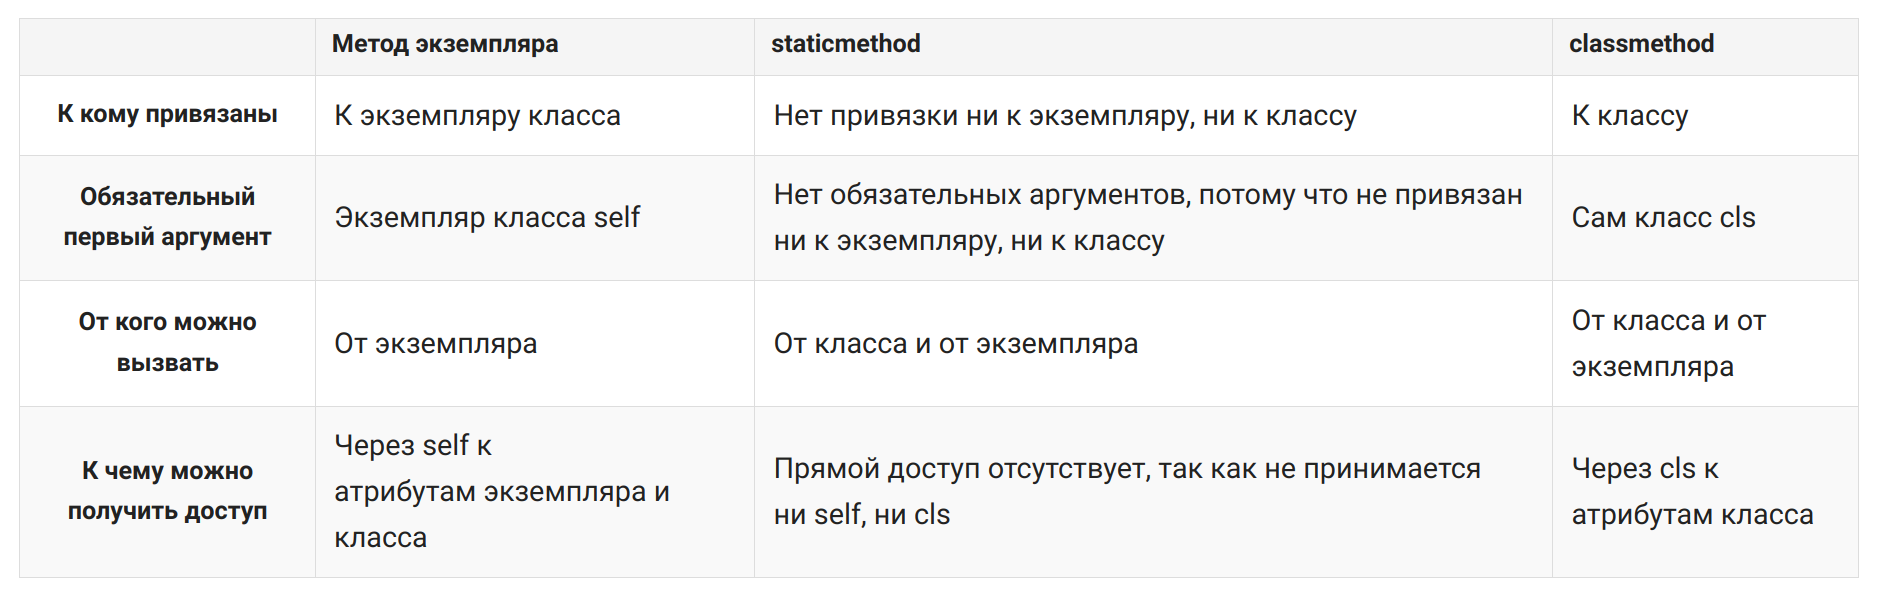

**Использование:**
* Статик-метод может использоваться в том случае, если есть желание сделать отдельную функцию частью класса, но чтобы она не использовала экземпляры класса или сам класс.
* Класс-методы обычно используются для добавления новых экземпляров класса или изменении/удалении уже имеющихся атрибутов экземпляра класса.

**Примечание:** метод, который занимается только созданием (порождением) новых объектов, называется фабричным методом. **Фабричный метод** (Factory method) — порождающий шаблон проектирования, определяющий общий интерфейс создания объектов в родительском классе и позволяющий изменять создаваемые объекты в дочерних классах.

In [ ]:
# шаблон создания метода класса
class className:

    @classmethod
    def class_method_name(cls, *args, **kwargs):
        pass


# шаблон создания статического метода
class className:

    @staticmethod
    def static_method_name(*args, **kwargs):
        pass

In [ ]:
# пример реализации функционального программирования через ООП при помощи статик-методов
class LengthConverter:
    METER = 'm'
    KILOMETER = 'km'
    MILE = 'mi'

    @staticmethod
    def meters_to_kilometers(m):
        return m / 1000

    @staticmethod
    def kilometers_to_meters(km):
        return km * 1000

    @staticmethod
    def meters_to_miles(m):
        return m / 1609.34

    @staticmethod
    def miles_to_meters(mi):
        return mi * 1609.34

    @staticmethod
    def kilometers_to_miles(km):
        return km / 1.60934

    @staticmethod
    def miles_to_kilometers(mi):
        return mi * 1.60934

    @staticmethod
    def format(value, unit):
        symbol = ''
        if unit == LengthConverter.METER:
            symbol = 'm'
        elif unit == LengthConverter.KILOMETER:
            symbol = 'km'
        elif unit == LengthConverter.MILE:
            symbol = 'mi'

        return f'{value}{symbol}'


km = LengthConverter.meters_to_kilometers(3506)
print(LengthConverter.format(km, LengthConverter.KILOMETER)) # 3.506km

In [ ]:
# пример использования класс-метода для добавления новых экземпляров класса
class Car:

    def __init__(self, model, color):
        self.model = model  
        self.color = color

    @classmethod
    def get_red_car(cls, model):
        return cls(model, 'red')


car1 = Car.get_red_car('Audi')
print(car1, car1.model, car1.color) # <__main__.Car object at 0x725147776360> Audi red

car2 = Car.get_red_car('BMW')
print(car2, car2.model, car2.color) # <__main__.Car object at 0x725147794e30> BMW red


# пример изменения атрибутов экземпляра класса через класс-метод
class Worker(object):
    count_workers = 0
    
    @classmethod
    def set_count(cls, value):
        cls.count_workers = value

    @classmethod
    def print_count(cls):
        print(cls.count_workers)

# **Пространство имён класса**

Все атрибуты класса и имена методов попадают в локальную область видимости (ко значениям можно получить доступ через точку, обращаясь к имени класса). Атрибут экземпляра тоже имеет доступ к локальной области класса, и через него можно получать доступ к атрибутам класса, методам, а также к атрибутам экземпляра, которые хранятся в атрибуте `__dict__`.

С доступом к атрибутам класса внутри методов чуть иначе. Внутри метода нельзя обращаться к атрибуту сугубо по его имени, поскольку методы и атрибуты класса находятся на одном уровне в локальной области видимости класса. Это значит, что если имя не будет найдено в методе, то далее поиск не осуществляется в локальной области видимости класса, а идет сразу в глобальную область модуля.

Для получения доступа к атрибутам класса внутри метода есть три способа:
1. Через использования параметра `self` в методе экземпляра (но если пробовать изменить атрибут - изменится атрибут экземпляра; для того, чтобы этого не было, нужно обращаться через `__class__`, как показано в примере).
2. Через обращение по имени класса.
3. Через обращение к классу через класс-методы.

Для того, чтобы изменить атрибут класса, необходимо обращаться к нему непосредственно - через имя класса или параметр `cls` в `classmethod`. Не через `self`. В противном случае, будет создаваться и изменяться атрибут экземпляра класса.

In [ ]:
# пример получения доступа к атрибутам класса внутри метода через self в методе ЭК
class DepartmentIT:
    PYTHON_DEV = 4
    GO_DEV = 3
    REACT_DEV = 2
  
    def get_info(self):
        print(self.PYTHON_DEV, self.GO_DEV, self.REACT_DEV)

it1 = DepartmentIT()
it1.get_info() # 4 3 2
# но если пробовать изменить атрибут, изменится атрибут ЭК
it1.PYTHON_DEV = 999
it1.get_info() # 999 3 2
# для того, чтобы так не было, нужно обращаться через __class__
print(it1.__class__.PYTHON_DEV) # 4

In [ ]:
# пример получения доступа к атрибутам класса внутри метода через использование имени класса
class DepartmentIT:
    PYTHON_DEV = 4
    GO_DEV = 3
    REACT_DEV = 2

    @staticmethod
    def get_info(): # можно через self, но так не очень
        print(DepartmentIT.PYTHON_DEV, DepartmentIT.GO_DEV, DepartmentIT.REACT_DEV)

DepartmentIT.get_info() # 4 3 2

In [ ]:
# пример получения доступа к атрибутам класса внутри метода при помощи classmethod
class DepartmentIT:
    PYTHON_DEV = 4
    GO_DEV = 3
    REACT_DEV = 2

    @classmethod
    def get_info(cls):
        print(cls.PYTHON_DEV, cls.GO_DEV, cls.REACT_DEV)

DepartmentIT.get_info() # 4 3 2